In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#drop duplicate columns
remove = []
cols = training.columns
for i in range(len(cols)-1):
    v = training[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,training[cols[j]].values):
            remove.append(cols[j])

test.drop(remove, axis=1, inplace=True)
training.drop(remove, axis=1, inplace=True)


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(116, 309)
(2, 309)


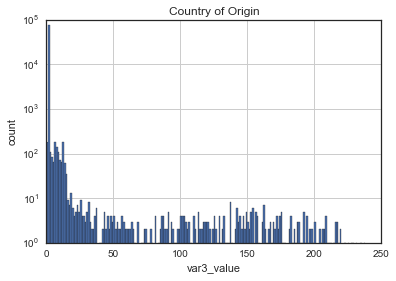

count    76001.000000
mean         2.716635
std          9.449145
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        238.000000
Name: var3, dtype: float64

In [2]:
%matplotlib inline
training.head(5)

#how many var3 are -99999?
print training.loc[training.var3==-999999].shape
print training.loc[training.var3==-999999].loc[training.TARGET == 1].shape
training = training.replace(-999999,2)
test = test.replace(-999999,2)
plt.figure(0)
training['var3'].hist(bins=200)
plt.gca().set_yscale("log")
plt.xlabel("var3_value")
plt.ylabel("count")
plt.title("Country of Origin")
plt.show()
training.var3.describe()

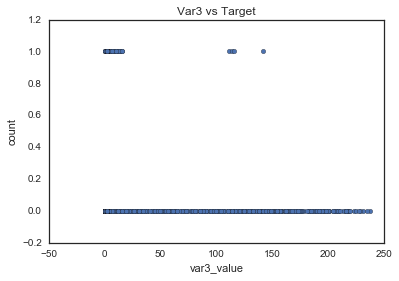

'sns.FacetGrid(training, hue="TARGET", size=6)    .map(plt.hist, "var3", bins=200)    .add_legend()\nplt.title(\'Unhappy Customers are from Spain\')\nplt.show()'

In [17]:
plt.figure(1)
plt.scatter(training['var3'], training['TARGET'])
plt.title("Var3 vs Target")
plt.xlabel("var3_value")
plt.ylabel("count")
plt.show()
'''sns.FacetGrid(training, hue="TARGET", size=6) \
   .map(plt.hist, "var3", bins=200) \
   .add_legend()
plt.title('Unhappy Customers are from Spain')
plt.show()'''

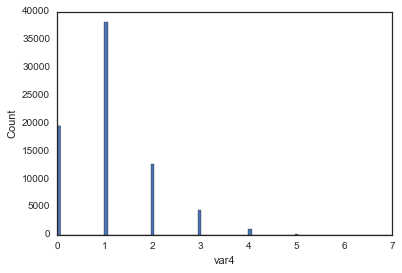

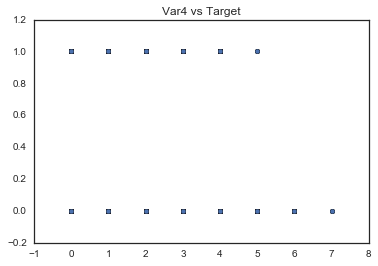

In [4]:
plt.hist(training['num_var4'], bins=100)
plt.xlabel('var4')
plt.ylabel('Count')
plt.show()

plt.figure(2)
plt.scatter(training['num_var4'], training['TARGET'])
plt.title("Var4 vs Target")
plt.show()

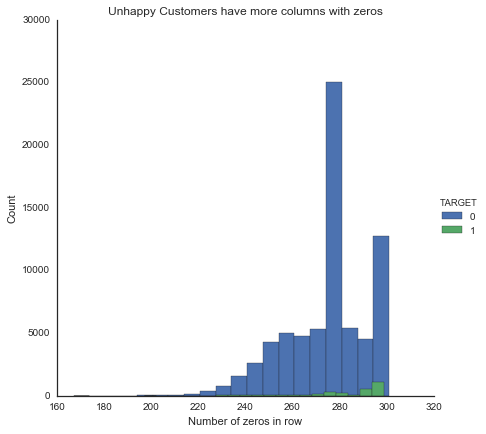

In [20]:
X = training.iloc[:,:-1]
y = training.TARGET
Xt = test.iloc[:,:-1]

X['n0'] = (X==0).sum(axis=1)
Xt['n0'] = (X==0).sum(axis=1)
training['n0'] = X['n0']
test['n0'] = X['n0']
plt.figure(2)
sns.FacetGrid(training, hue="TARGET", size=6) \
   .map(plt.hist, "n0", bins=20) \
   .add_legend()
plt.ylabel("Count")
plt.xlabel("Number of zeros in row")
plt.title('Unhappy Customers have more columns with zeros')
plt.show()

plt.figure(3)

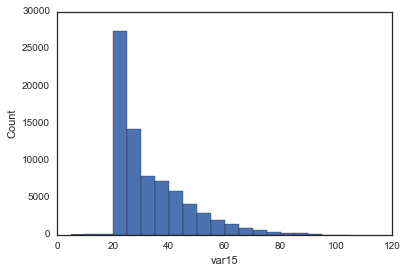

count    76001.000000
mean        33.212339
std         12.955570
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

In [6]:
plt.hist(training['var15'], bins=20)
plt.xlabel('var15')
plt.ylabel('Count')
plt.show()

training.var15.describe()

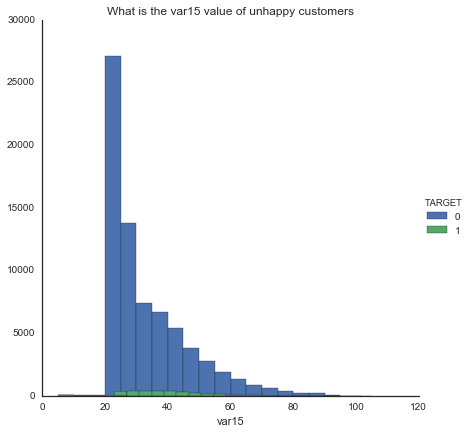

In [7]:
sns.FacetGrid(training, hue="TARGET", size=6) \
   .map(plt.hist, "var15", bins=20) \
   .add_legend()
plt.title('What is the var15 value of unhappy customers')
plt.show()

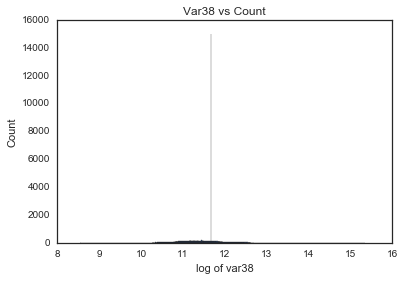

In [8]:
plt.hist(training['var38'].map(np.log), bins=2000)
plt.xlabel('log of var38')
plt.ylabel('Count')
plt.title("Var38 vs Count")
plt.show()


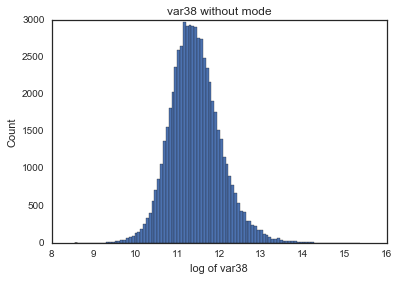

In [9]:
plt.hist(training.loc[~np.isclose(training.var38, 117310.979016), 'var38'].map(np.log), bins=100)
plt.title("var38 without mode")
plt.xlabel('log of var38')
plt.ylabel('Count')


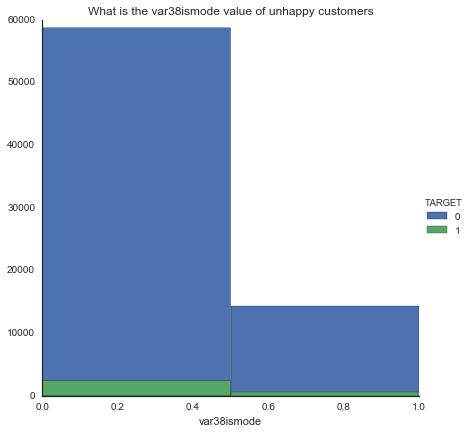

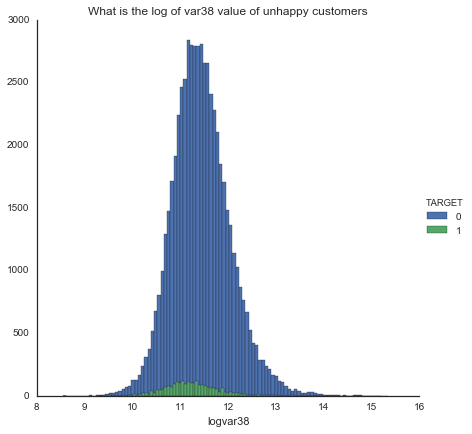

In [10]:
training['var38ismode'] = np.isclose(training.var38, 117310.979016)
training['logvar38'] = training.loc[~training['var38ismode'], 'var38'].map(np.log)
training.loc[training['var38ismode'], 'logvar38'] = 0

test['var38ismode'] = np.isclose(test.var38, 117310.979016)
test['logvar38'] = test.loc[~test['var38ismode'], 'var38'].map(np.log)
test.loc[test['var38ismode'], 'logvar38'] = 0

training_copy = training
training_copy = training_copy[training_copy.logvar38 != 0]

sns.FacetGrid(training, hue="TARGET", size=6) \
   .map(plt.hist, "var38ismode", bins=2) \
   .add_legend()
plt.title('What is the var38ismode value of unhappy customers')
plt.show()

sns.FacetGrid(training_copy, hue="TARGET", size=6) \
   .map(plt.hist, "logvar38", bins=100) \
   .add_legend()
plt.title('What is the log of var38 value of unhappy customers')
plt.show()


In [11]:
print training.loc[training['TARGET'] == 1].loc[training['var38ismode'] == 1].count()[0]
print training.loc[training['TARGET'] == 1].loc[training['var38ismode'] == 0].count()[0]
print training.loc[training['var38ismode'] == 1].count()[0]
print training.loc[training['var38ismode'] == 0].count()[0]
print training.shape

print 614.0/14869.0
print 2394.0/61151.0

614
2394
14869
61132
(76001, 312)
0.0412939673145
0.0391489918399


### 

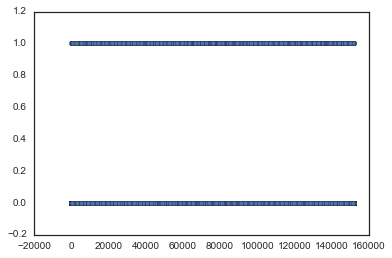

In [12]:
'''sns.FacetGrid(training_copy, hue="TARGET", size=6) \
   .map(plt.hist, "ID", bins=10) \
   .add_legend()
plt.title('ID vs TARGET')
plt.show()'''
plt.scatter(training['ID'], training['TARGET'])
plt.show()

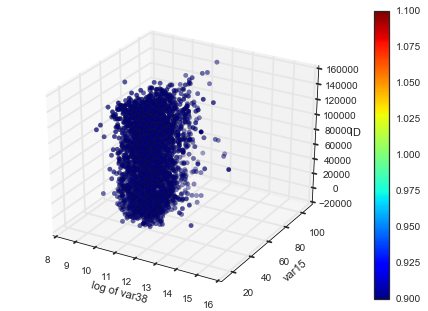

In [16]:
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    #ax.set_xscale3d('log')
    ax.set_xlim3d(8, 16)
    #ax.set_ylim3d(0, 10)
    #ax.set_zlim3d(0, 10)

    ax.set_xlabel('log of var38')
    ax.set_ylabel('var15')
    ax.set_zlabel('ID')
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

scatter3d(np.log(training['var38'].loc[training.TARGET == 1]), training['var15'].loc[training.TARGET == 1], training['ID'].loc[training.TARGET == 1], training['TARGET'].loc[training.TARGET == 1])

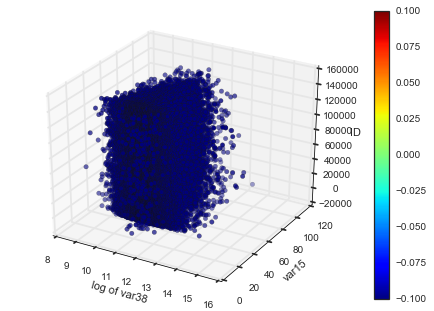

In [15]:
scatter3d(np.log(training['var38'].loc[training.TARGET == 0]), training['var15'].loc[training.TARGET == 0], training['ID'].loc[training.TARGET == 0], training['TARGET'].loc[training.TARGET == 0])